<a href="https://colab.research.google.com/github/sergioarnold87/Practica_Sergio/blob/main/Ejercicio_Intervalo_de_Confianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# * Estimación puntual

In [21]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random

In [22]:
np.random.seed(2020)
population_ages1 = stats.poisson.rvs(loc = 18, mu = 35, size = 1500000)
population_ages2 = stats.poisson.rvs(loc = 18, mu = 10, size = 1000000)
population_ages = np.concatenate((population_ages1, population_ages2))

print(population_ages1.mean())
print(population_ages2.mean())
print(population_ages.mean())

52.998824666666664
27.999569
42.9991224


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfc04fb690>]],
      dtype=object)

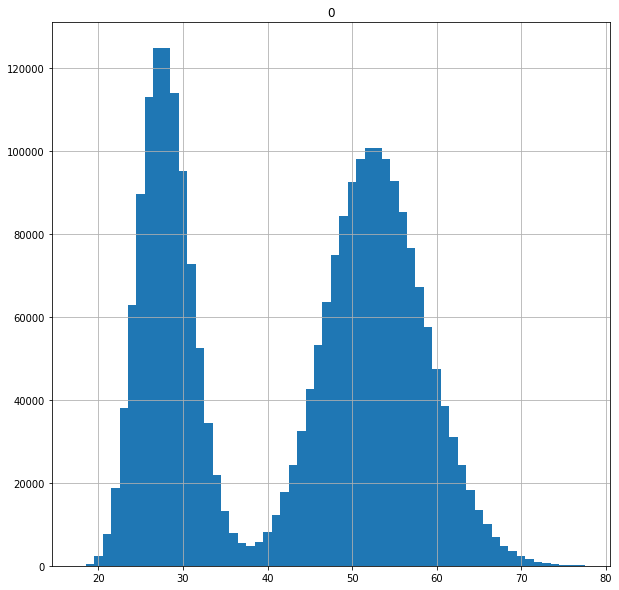

In [23]:
pd.DataFrame(population_ages).hist(bins = 60, range = (17.5, 77.5), figsize = (10,10))

In [24]:
stats.skew(population_ages)

-0.11907136129560125

In [25]:
stats.kurtosis(population_ages)

-1.4593749125303193

In [26]:
np.random.seed(42)
sample_ages = np.random.choice(population_ages, 500)
print(sample_ages)

[35 27 27 26 45 47 29 27 29 55 31 45 54 23 45 45 60 27 47 25 46 55 49 30
 49 56 59 48 52 27 27 26 58 49 52 35 50 66 57 26 31 30 25 60 49 24 51 51
 31 55 55 44 28 59 25 31 30 53 27 31 48 46 44 23 26 55 51 57 23 54 57 36
 54 43 54 63 48 31 55 23 31 55 46 49 25 29 24 29 30 23 57 32 26 52 33 28
 44 26 54 56 51 26 44 31 59 22 30 60 22 51 25 51 55 55 29 55 27 57 28 54
 33 33 54 60 50 48 46 69 46 23 56 27 54 39 50 31 62 25 30 50 28 30 55 55
 45 30 30 61 25 27 55 25 55 51 58 28 29 30 57 25 50 54 41 26 33 62 27 56
 53 30 56 60 30 58 45 54 53 49 54 58 30 48 64 28 50 30 55 61 45 29 50 27
 24 26 52 33 46 28 24 50 48 32 31 22 60 24 43 32 52 25 27 48 32 47 61 45
 55 49 50 56 28 31 26 53 50 51 25 50 30 53 53 58 23 50 61 53 53 31 26 54
 26 25 47 24 52 33 50 52 51 26 45 41 59 29 59 26 59 53 46 27 59 49 54 50
 34 60 58 21 42 55 50 52 28 34 27 51 29 30 30 51 30 29 25 27 25 52 27 24
 39 50 28 27 31 60 48 45 54 28 56 49 24 50 26 54 59 30 27 26 28 57 50 27
 51 48 31 64 50 30 55 29 25 47 34 47 64 55 52 30 54

In [27]:
population_ages.mean() - sample_ages.mean()

0.6431223999999958

In [28]:
population_races = (["blanca"]*1000000) + (["negra"]*500000) + (["hispana"]*500000) + (["asiatica"]*250000) + (["otros"]*250000)

In [29]:
for race in set(population_races):
  print("Proporcion de "+race)
  print(population_races.count(race) / 2500000)

Proporcion de asiatica
0.1
Proporcion de blanca
0.4
Proporcion de hispana
0.2
Proporcion de otros
0.1
Proporcion de negra
0.2


In [30]:
random.seed(31)
race_sample = random.sample(population_races, 1000)

In [31]:
for race in set(race_sample):
  print("Proporcion de "+race)
  print(race_sample.count(race) / 1000)

Proporcion de asiatica
0.101
Proporcion de blanca
0.379
Proporcion de hispana
0.201
Proporcion de otros
0.102
Proporcion de negra
0.217


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfc03a0510>]],
      dtype=object)

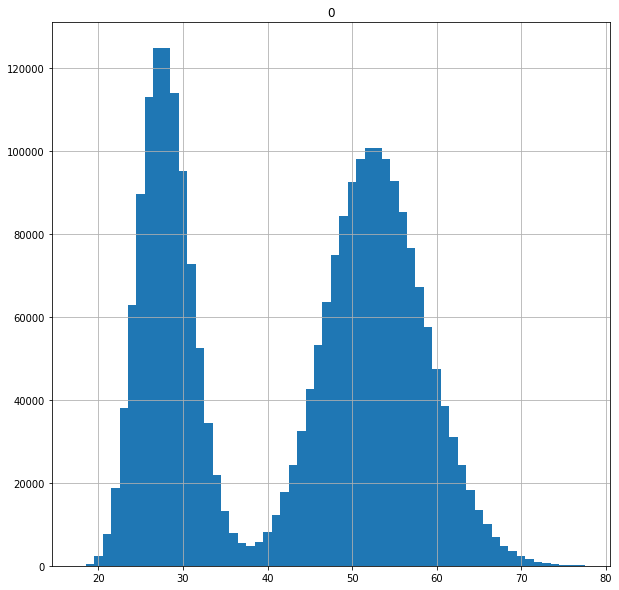

In [32]:
pd.DataFrame(population_ages).hist(bins = 60, range = (17.5, 77.5), figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfc0293c10>]],
      dtype=object)

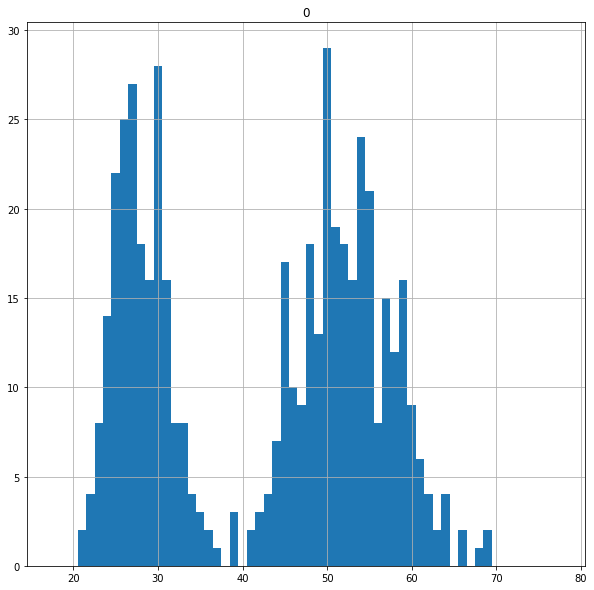

In [33]:
pd.DataFrame(sample_ages).hist(bins = 60, range = (17.5, 77.5), figsize = (10,10))

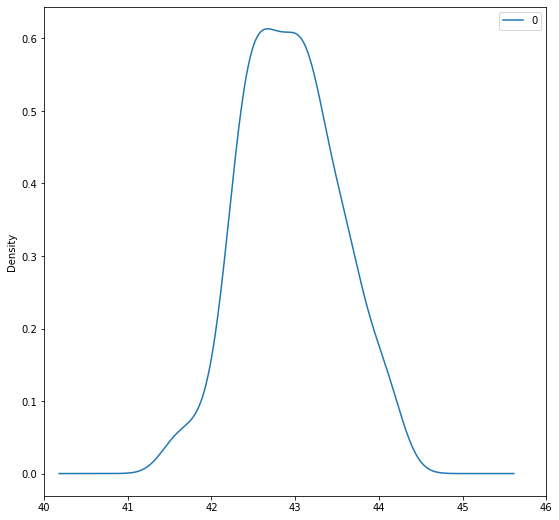

In [34]:
np.random.sample(1988)

point_estimates = []

for x in range(200):
  sample = np.random.choice(population_ages, size = 500)
  point_estimates.append(sample.mean())

pd.DataFrame(point_estimates).plot(kind = "density", figsize = (9,9), xlim = (40, 46) )

In [35]:
np.array(point_estimates).mean()

42.94352

**Si conocemos la desviación típica**

1.   Elemento de la lista
2.   Elemento de la lista

In [36]:
np.random.seed(10)

n = 1000
alpha = 0.05

sample = np.random.choice(population_ages, size = n)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 1-alpha/2)

sigma = population_ages.std()## sigma de la población

sample_error = z_critical * sigma / math.sqrt(n)

ci = (sample_mean - sample_error, sample_mean + sample_error)
ci

(42.23912299964774, 43.878877000352254)

In [37]:
np.random.seed(10)

n = 1000
alpha = 0.05

intervals = []
sample_means = []

z_critical = stats.norm.ppf(q = 1-alpha/2)

sigma = population_ages.std()## sigma de la población

sample_error = z_critical * sigma / math.sqrt(n)

for sample in range(100):

  sample = np.random.choice(population_ages, size = n)
  sample_mean = sample.mean()
  sample_means.append(sample_mean)

  ci = (sample_mean - sample_error, sample_mean + sample_error)
  intervals.append(ci)

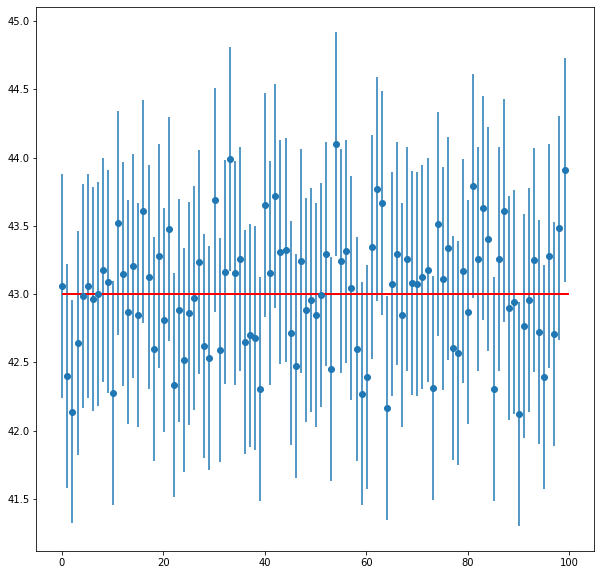

In [38]:
plt.figure(figsize=(10,10))
plt.errorbar(x = np.arange(0.1, 100, 1), y = sample_means, yerr=[(top-bottom)/2 for top, bottom in intervals], fmt='o')
plt.hlines(xmin = 0, xmax = 100, y = population_ages.mean(), linewidth=2.0, color="red")

4.0
2.8284271247461903


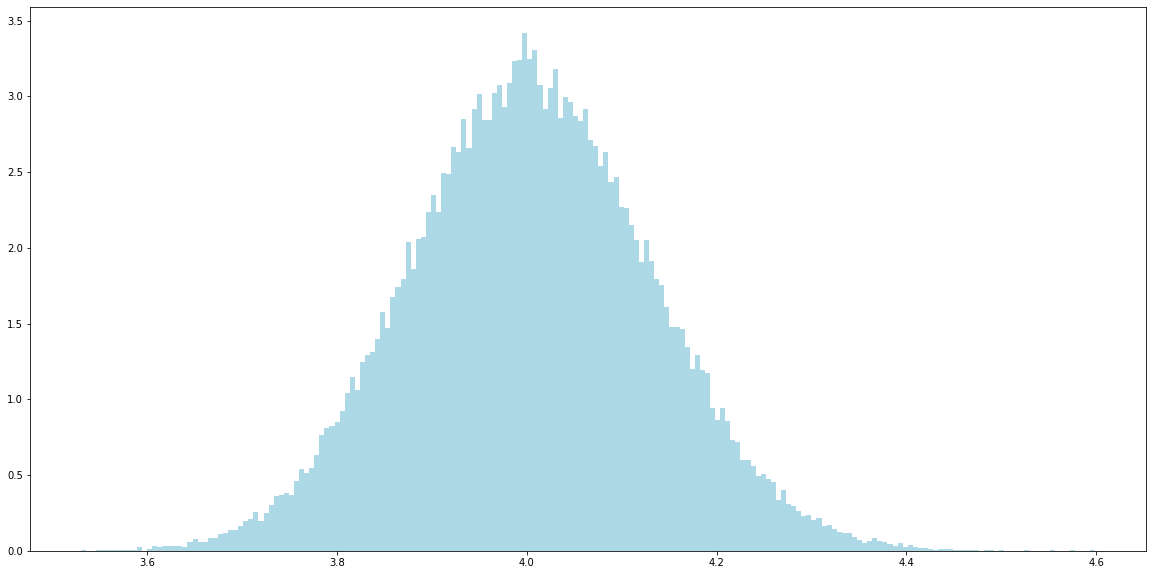

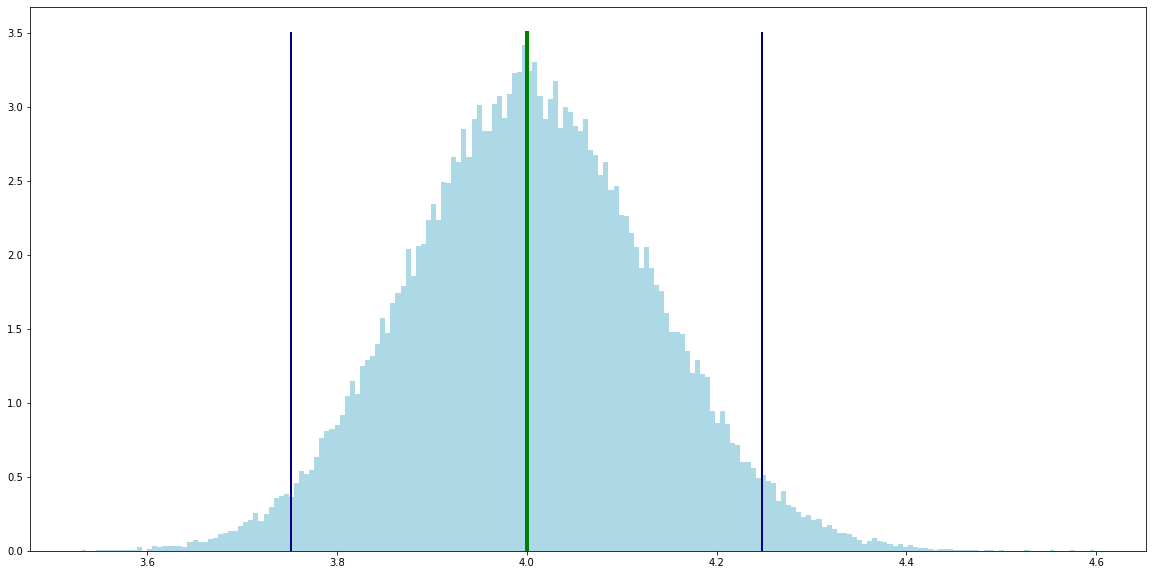

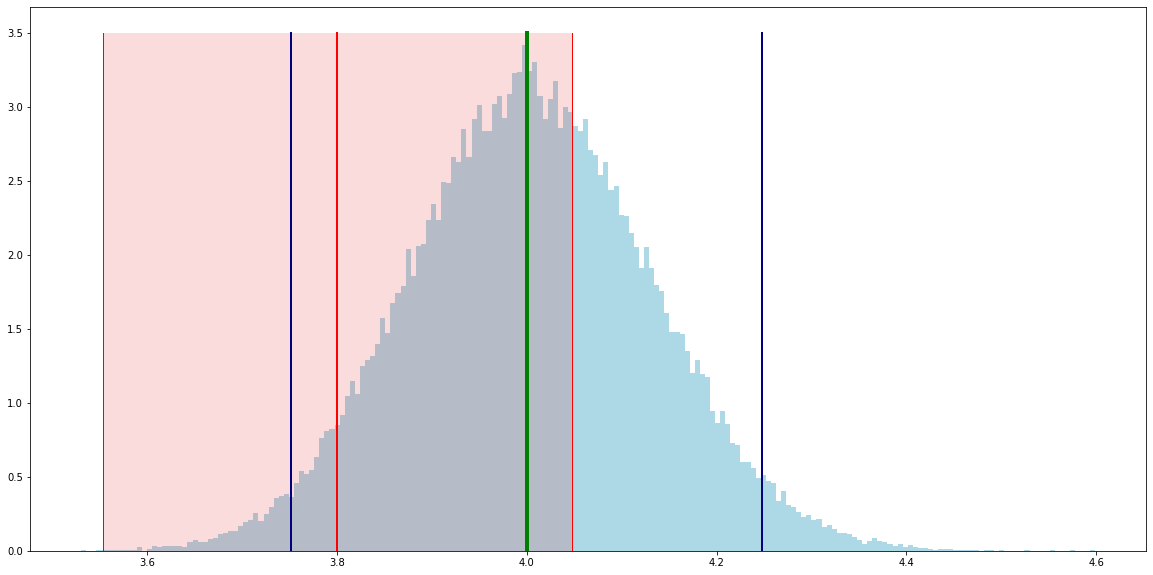

Número de intervalos de confianza que contienen el valor real de mu:  94


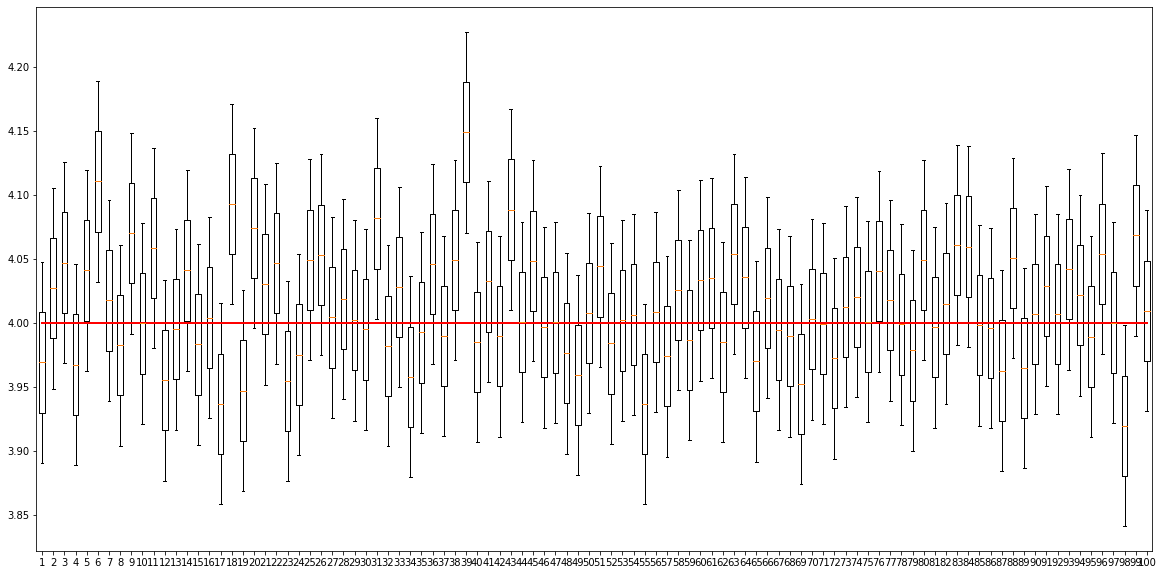

In [43]:
# **Si la desviación típica no es conocida...**


np.random.seed(10)

n = 25
alpha = 0.05

sample = np.random.choice(population_ages, size = n)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 1-alpha/2, df = n-1)

sample_sd = sample.std(ddof=1)## desviación estándar de la muestra

sample_error = t_critical * sample_sd / math.sqrt(n)

ci = (sample_mean - sample_error, sample_mean + sample_error)
ci

stats.t.ppf(q = 1-alpha, df = n-1) - stats.norm.ppf(1-alpha)

stats.t.ppf(q = 1-alpha, df = 999) - stats.norm.ppf(1-alpha)

stats.t.interval(alpha = 0.95, df = 24, loc = sample_mean, scale = sample_sd/math.sqrt(n))

# **Intervalo para la proporción poblacional**

alpha = 0.05
n = 1000
z_critical = stats.norm.ppf(q=1-alpha/2)
p_hat = race_sample.count("blanca") / n

sample_error = z_critical * math.sqrt((p_hat*(1-p_hat)/n))

ci = (p_hat - sample_error, p_hat + sample_error)
ci

stats.norm.interval(alpha = 0.95, loc = p_hat, scale = math.sqrt(p_hat*(1-p_hat)/n))

# **Cómo interpretar el intervalo de confianza**

shape, scale = 2.0, 2.0 #mean = 4, std = 2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)

mu = shape*scale 
sigma = scale*np.sqrt(shape)

print(mu)
print(sigma)

meansample = []
sample_size = 500
for i in range(0,50000):
  sample = random.choices(s, k=sample_size)
  meansample.append(sum(sample)/len(sample))

plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color="lightblue")
plt.show()

plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color="lightblue")
plt.plot([mu,mu], [0, 3.5], 'k-', lw=4, color='green')
plt.plot([mu-1.96*sigma/np.sqrt(sample_size), mu-1.96*sigma/np.sqrt(sample_size)], [0, 3.5], 'k-', lw=2, color="navy")
plt.plot([mu+1.96*sigma/np.sqrt(sample_size), mu+1.96*sigma/np.sqrt(sample_size)], [0, 3.5], 'k-', lw=2, color="navy")
plt.show()

sample_data = np.random.choice(s, size = sample_size)
x_bar = sample_data.mean()
ss = sample_data.std()

plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color="lightblue")
plt.plot([mu,mu], [0, 3.5], 'k-', lw=4, color='green')
plt.plot([mu-1.96*sigma/np.sqrt(sample_size), mu-1.96*sigma/np.sqrt(sample_size)], [0, 3.5], 'k-', lw=2, color="navy")
plt.plot([mu+1.96*sigma/np.sqrt(sample_size), mu+1.96*sigma/np.sqrt(sample_size)], [0, 3.5], 'k-', lw=2, color="navy")
plt.plot([x_bar, x_bar], [0,3.5], 'k-', lw=2, color="red")
plt.plot([x_bar-1.96*ss/np.sqrt(sample_size), x_bar-1.96*ss/np.sqrt(sample_size)], [0, 3.5], 'k-', lw=1, color="red")
plt.plot([x_bar+1.96*ss/np.sqrt(sample_size), x_bar+1.96*ss/np.sqrt(sample_size)], [0, 3.5], 'k-', lw=1, color="red")
plt.gca().add_patch(plt.Rectangle((x_bar-1.96*ss/np.sqrt(sample_size), 0), 2*(1.96*ss/np.sqrt(sample_size)), 3.5, fill=True, fc=(0.9, 0.1, 0.1, 0.15)))
plt.show()

interval_list = []
z_critical = 1.96 #z_0.975
sample_size = 5000
c = 0
error = z_critical*sigma/np.sqrt(sample_size)

for i in range(0,100):
  rs = random.choices(s, k=sample_size)
  mean = np.mean(rs)
  ub = mean + error
  lb = mean - error
  interval_list.append([lb, mean, ub])
  if ub >= mu and lb <= mu:
    c += 1  

c

print("Número de intervalos de confianza que contienen el valor real de mu: ",c)
plt.figure(figsize = (20, 10))
plt.boxplot(interval_list)
plt.plot([1,100], [mu, mu], 'k-', lw=2, color="red")
plt.show()